In [ ]:
import numpy as np
from n2v.models import N2VConfig, N2V
from n2v.internals.N2V_DataGenerator import N2V_DataGenerator
from matplotlib import pyplot as plt
from helpers import *


In [9]:
data_path, output_path = get_paths()

image001 = load_image(data_path, 'Image001/data.npy')
image001.shape

(400, 512, 512)

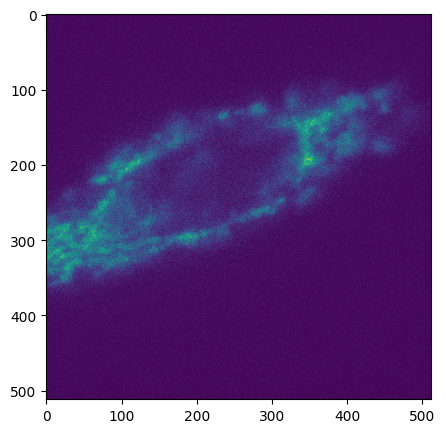

In [10]:
# Let's look at the image.
# We have to remove the added extra dimension to display it as 2D image.
plt.figure(figsize=(10,5))
plt.imshow(image001[0, :, :])
plt.show()

In [11]:
img1 = image001[0]
single_image_normalized = (img1 - img1.min()) / (img1.max() - img1.min())

print(f"Single image shape: {single_image_normalized.shape}")

Single image shape: (512, 512)


In [12]:
# Create a data generator
datagen = N2V_DataGenerator()

# Add dimension to single image to simulate batch and channel
single_image_expanded = np.expand_dims(single_image_normalized, axis=(0, -1))  # Shape: (1, 512, 512, 1)

# Generate patches for training
patches = datagen.generate_patches_from_list([single_image_expanded], shape=(64, 64))  # Patch size: (64, 64)

# Define model configuration
config = N2VConfig(
    single_image_expanded,
    unet_kern_size=3,
    train_steps_per_epoch=100,
    train_epochs=5,
    train_loss='mse',
    batch_norm=True,
    train_batch_size=4,
    n2v_perc_pix=1.6,
    n2v_patch_shape=(64, 64),
    n2v_manipulator='uniform_withCP',
    n2v_neighborhood_radius=5,
)

# Create the Noise2Void model
model = N2V(config, "n2v_single_image", basedir="models")



Generated patches: (512, 64, 64, 1)


In [13]:
patches.shape

(512, 64, 64, 1)

In [14]:
# Train the model
model.train(patches[:480], patches[480:])  # Using part of the data for validation

65 blind-spots will be generated per training patch of size (64, 64).


Preparing validation data: 100%|██████████| 32/32 [00:00<00:00, 1150.46it/s]

Epoch 1/5


100/100 [==============================] - 8s 78ms/step - loss: 0.5204 - n2v_mse: 0.5204 - n2v_abs: 0.4614 - val_loss: 0.8528 - val_n2v_mse: 0.8528 - val_n2v_abs: 0.6045 - lr: 4.0000e-04
Epoch 2/5
100/100 [==============================] - 7s 70ms/step - loss: 0.3980 - n2v_mse: 0.3980 - n2v_abs: 0.4034 - val_loss: 0.6026 - val_n2v_mse: 0.6026 - val_n2v_abs: 0.4782 - lr: 4.0000e-04
Epoch 3/5
100/100 [==============================] - 7s 67ms/step - loss: 0.3653 - n2v_mse: 0.3653 - n2v_abs: 0.3915 - val_loss: 0.4486 - val_n2v_mse: 0.4486 - val_n2v_abs: 0.5106 - lr: 4.0000e-04
Epoch 4/5
100/100 [==============================] - 7s 67ms/step - loss: 0.2332 - n2v_mse: 0.2332 - n2v_abs: 0.3220 - val_loss: 0.3774 - val_n2v_mse: 0.3774 - val_n2v_abs: 0.4242 - lr: 4.0000e-04
Epoch 5/5
100/100 [==============================] - 7s 67ms/step - loss: 0.2687 - n2v_mse: 0.2687 - n2v_abs: 0.3287 - val_loss: 0.6015 - val_n2v_mse: 0.6015 - val_n2v_abs: 0.6032 - lr: 4.0000e-04

Loading network weights 

In [15]:
# Apply the model to denoise the image
denoised_image = model.predict(single_image_expanded.reshape(512, 512), axes='YX')  # Predicts denoised image

print(f"Denoised image shape: {denoised_image.shape}")

The input image is of type float64 and will be casted to float32 for prediction.
1/1 [==============================] - 0s 391ms/step
Denoised image shape: (512, 512)


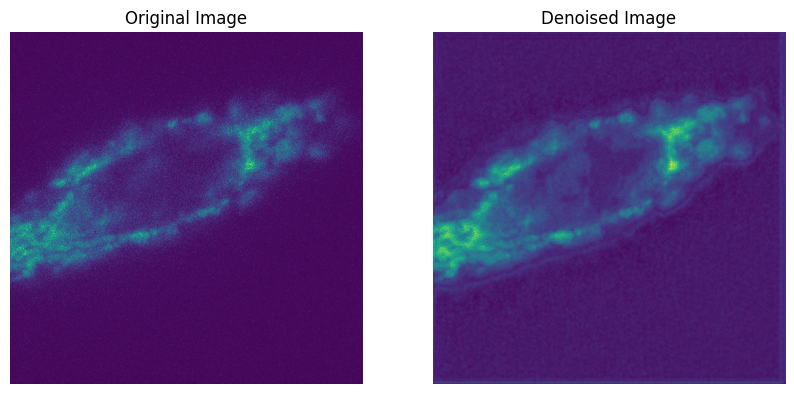

In [16]:
# Plot the original and denoised images
plt.figure(figsize=(10, 5))

# Original image
plt.subplot(1, 2, 1)
plt.title("Original Image")
plt.imshow(single_image_normalized)
plt.axis('off')

# Denoised image
plt.subplot(1, 2, 2)
plt.title("Denoised Image")
plt.imshow(denoised_image)
plt.axis('off')

plt.show()
